# Fraudulent_Transaction Detection

This case requires trainees to develop a model for predicting fraudulent transactions for a
financial company and use insights from the model to develop an actionable plan. Data for the
case is available in CSV format having 6362620 rows and 10 columns.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
#reading csv
df = pd.read_csv("Fraud.csv")

In [3]:
#show first 200 records
df.head(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,C2121995675,0.0,0.00,C1170794006,1442298.03,22190.99,0,0
196,1,CASH_OUT,36437.06,C2120063568,0.0,0.00,C1740000325,154606.00,1363368.51,0,0
197,1,CASH_OUT,82691.56,C1620409359,0.0,0.00,C248609774,657983.89,6453430.91,0,0
198,1,CASH_OUT,338767.10,C691691381,0.0,0.00,C453211571,544481.28,3461666.05,0,0


In [4]:
#show last 200 records
df.tail(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362420,727,TRANSFER,124582.58,C651444933,124582.58,0.0,C1161818914,0.00,0.00,1,0
6362421,727,CASH_OUT,124582.58,C1098290230,124582.58,0.0,C1739564153,320485.06,445067.64,1,0
6362422,727,TRANSFER,263401.81,C806437930,263401.81,0.0,C1469754483,0.00,0.00,1,0
6362423,727,CASH_OUT,263401.81,C850961884,263401.81,0.0,C1203132980,251586.80,514988.60,1,0
6362424,727,TRANSFER,69039.64,C922622756,69039.64,0.0,C417851521,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [5]:
# number of rows and column in dataset
df.shape

(6362620, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## The isFraud and isFlaggedFraud variable is read as an integer. Since this is the class variable, we convert it to object type. The following python code is used to perform this conversion.

In [7]:
# Convert class variables type to object
df['isFraud'] = df['isFraud'].astype('object')
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('object')

## Summary Statistics

In [8]:
# Summary of Statistics of Numeric Variables
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


In [9]:
# : Summary of Statistics of catgorical Variables
df.describe(include="object")

,type,nameOrig,nameDest,isFraud,isFlaggedFraud
count,6362620,6362620,6362620,6362620,6362620
unique,5,6353307,2722362,2,2
top,CASH_OUT,C1902386530,C1286084959,0,0
freq,2237500,3,113,6354407,6362604


## Missing Values Check

In [10]:
df.isnull().values.any()

False

## Class Imbalance

In [11]:
nofraud = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
nofraud_percent = (nofraud / (fraud + nofraud)) * 100
fraud_percent = (fraud / (fraud + nofraud)) * 100
  
# initialize list of lists
data = [['nofraud', nofraud,nofraud_percent], ['fraud', fraud,fraud_percent]]
  
# Create the pandas DataFrame
class_imbalance = pd.DataFrame(data, columns=['label', 'count','Percentage(%)'])
  
# print dataframe.
class_imbalance

,label,count,Percentage(%)
0,nofraud,6354407,99.870918
1,fraud,8213,0.129082


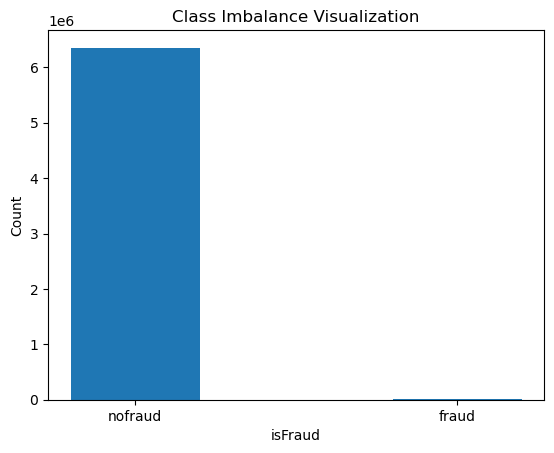

In [12]:
#Class Imbalance Visualization
plt.bar(['nofraud','fraud'],[nofraud,fraud],width= 0.4)
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.title("Class Imbalance Visualization")
plt.show()

### Only 0.13% (8,213) transactions in the dataset are fraudulent indicating high-classimbalance in the dataset. This is important because if we build a machine learning modelon this highly skewed data, the non-fraudulent transactions will influence the training of the model almost entirely, thus affecting the results.

# There is not information for customers that start with M (Merchants).

In [13]:
df_without_M=df[df['nameDest'].str[0]=='M']
df_without_M.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [14]:
len(df_without_M[df_without_M['isFraud']==1])

0

# Types of Transaction

In [15]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [16]:
payment = len(df[df.type == 'PAYMENT'])

cash_out = len(df[df.type == 'CASH_OUT'])

cash_in = len(df[df.type == 'CASH_IN'])

transfer = len(df[df.type == 'TRANSFER'])

debit = len(df[df.type == 'DEBIT'])

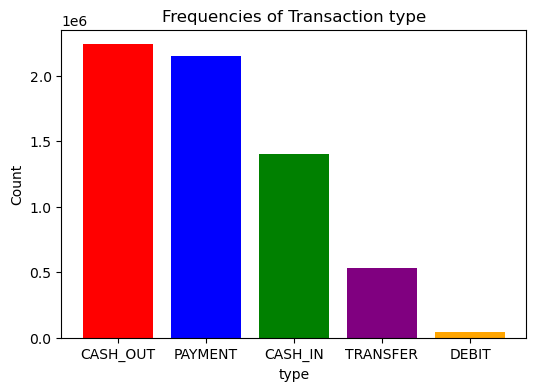

In [17]:
#Class Imbalance Visualization

col = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']
val = [cash_out, payment, cash_in, transfer, debit ]
plt.figure(figsize=(6,4))
bar_colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.bar(col,val,width=0.8,color=bar_colors)
plt.xlabel("type")
plt.ylabel("Count")
plt.title("Frequencies of Transaction type")
plt.show()

# Copy data Frame for Feature engineering

In [18]:
new_df=df
new_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Label Encoding of categorical data

In [26]:
# Checking how many attributes are dtype: object
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud'], dtype='object')


In [27]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


<AxesSubplot:>

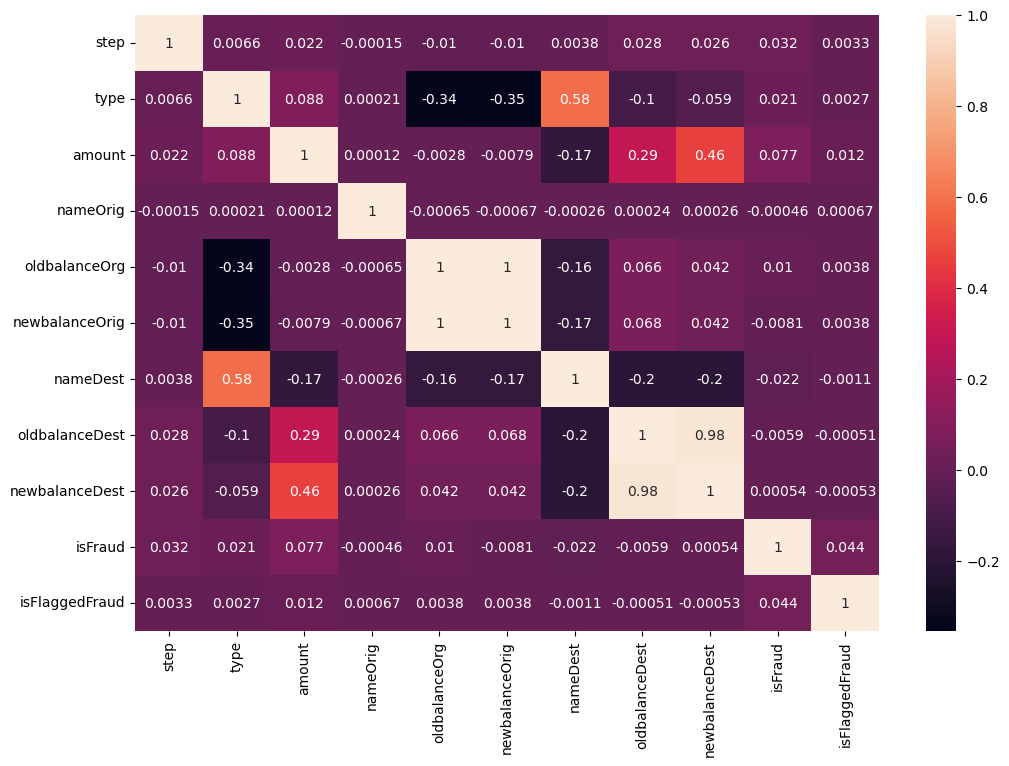

In [28]:
corr=df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

# MULTICOLINEARITY

In [29]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

Thus combine these pairs of collinear attributes and drop the individual ones.

In [30]:
df['Actual_amount_orig'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['Actual_amount_dest'] = df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df['TransactionPath'] = df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
df = df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)
df

,type,amount,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,TransactionPath
0,3,9839.64,0,0,9839.64,0.00,2419963.0
1,3,1864.28,0,0,1864.28,0.00,3922922.0
2,4,181.00,1,0,181.00,0.00,1441841.0
3,1,181.00,1,0,181.00,21182.00,6219958.0
4,3,11668.14,0,0,11668.14,0.00,4274900.0
...,...,...,...,...,...,...,...
6362615,1,339682.13,1,0,339682.13,-339682.13,6157710.0
6362616,4,6311409.28,1,0,6311409.28,0.00,1998227.0
6362617,1,6311409.28,1,0,6311409.28,-6311409.27,642182.0
6362618,4,850002.52,1,0,850002.52,0.00,2572645.0


In [31]:
calc_vif(df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<AxesSubplot:>

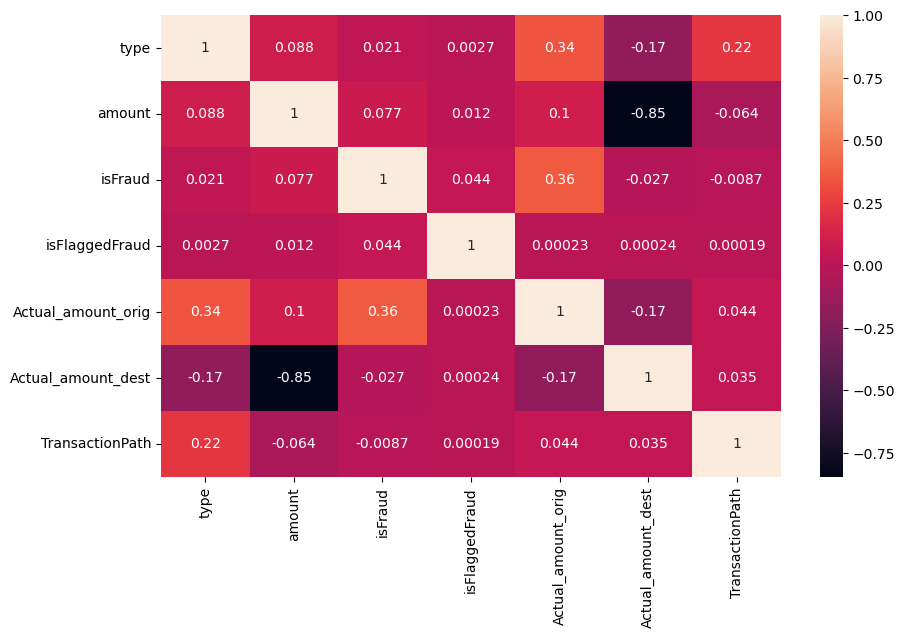

In [32]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

How did you select variables to be included in the model?

Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# NORMALIZING (SCALING) AMOUNT

In [34]:
# Perform Scaling
scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["amount"].values.reshape(-1, 1))
df.drop(["amount"], inplace= True, axis= 1)

Y = df["isFraud"]
X = df.drop(["isFraud"], axis= 1)

# Split the dataset

In [35]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


# Model Training

In [36]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test)*100

In [37]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [38]:
# Print scores of our classifiers 

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.92251619615818
Random Forest Score:  99.95882199471286


In [39]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


TP,FP,TN,FN - Decision Tree
True Positives: 1719
False Positives: 763
True Negatives: 1905588
False Negatives: 716
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 1711
False Positives: 62
True Negatives: 1906289
False Negatives: 724


In [40]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1905588     763]
 [    716    1719]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[1906289      62]
 [    724    1711]]


### Classification report

In [41]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.69      0.71      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.97      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



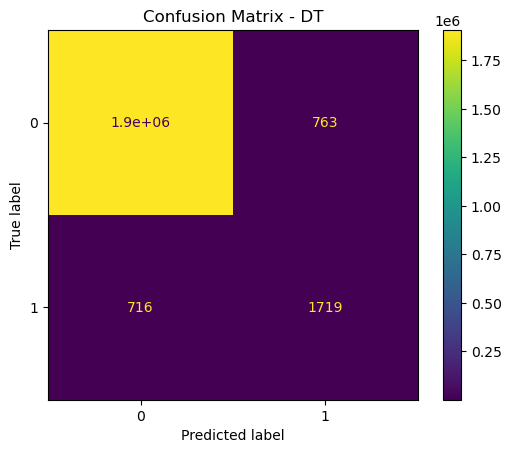

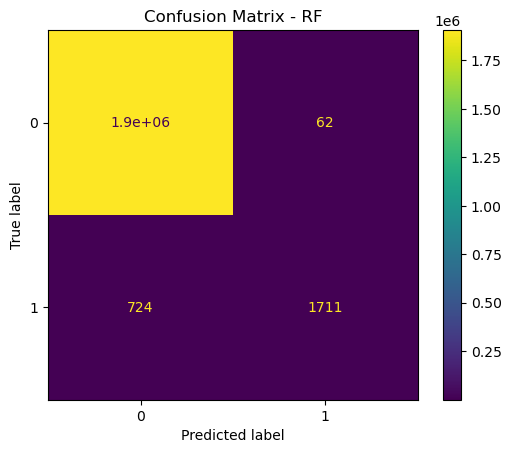

In [43]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

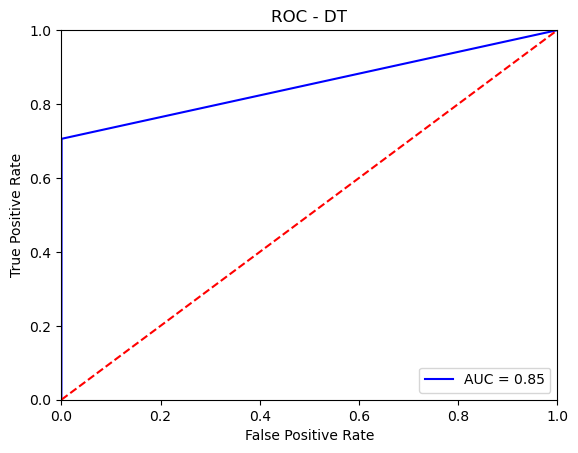

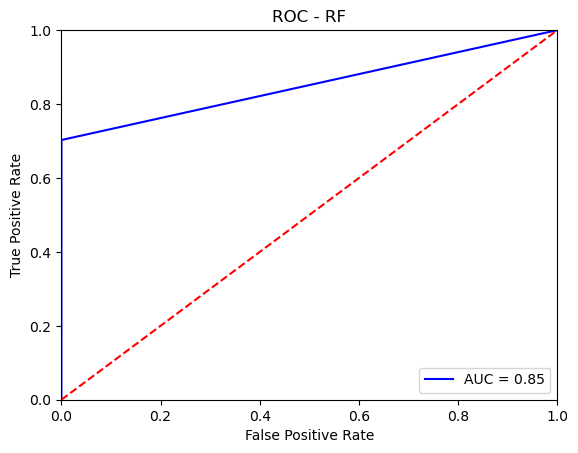

In [44]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature Engineering

In [19]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [20]:
fraud_transaction = new_df[new_df['isFraud']==1]
len(fraud_transaction)

8213

In [21]:
len(fraud_transaction['nameOrig'].unique())

8213

In [22]:
len(fraud_transaction['nameDest'].unique())

8169

In [23]:
fraud_transaction.groupby(['nameDest'])['nameDest'].count().sort_values(ascending=False)


nameDest
C2020337583    2
C650699445     2
C475338087     2
C505532836     2
C1185292292    2
              ..
C1661119285    1
C1661087818    1
C1660826618    1
C1660783549    1
C999955448     1
Name: nameDest, Length: 8169, dtype: int64

# There is not information for customers that start with M (Merchants).

In [24]:
new_df['nameDest'].str[0].unique()

array(['M', 'C'], dtype=object)

In [25]:
# Merchants
merchant_M = new_df[new_df['nameDest'].str[0]=='M']
merchant_M.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [26]:
len(merchant_M[merchant_M['isFraud']==1])

0

In [27]:
new_df["isM"] = 0
new_df.loc[new_df['nameDest'].str[0]=='M', "isM"] = 1
new_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isM
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0


# Percentage of fraud transaction of transaction type

In [28]:
payment = len(fraud_transaction[fraud_transaction.type == 'PAYMENT'])

cash_out = len(fraud_transaction[fraud_transaction.type == 'CASH_OUT'])

cash_in = len(fraud_transaction[fraud_transaction.type == 'CASH_IN'])

transfer = len(fraud_transaction[fraud_transaction.type == 'TRANSFER'])

debit = len(fraud_transaction[fraud_transaction.type == 'DEBIT'])



payment_per = (payment/len(fraud_transaction))*100

cash_out_per = (cash_out/len(fraud_transaction))*100

cash_in_per = (cash_in/len(fraud_transaction))*100

transfer_per = (transfer/len(fraud_transaction))*100

debit_per = (debit/len(fraud_transaction))*100

print(payment,cash_out, cash_in, transfer ,debit)
col = ['type','count','%percentage']
val = [['CASH_OUT', cash_out,cash_out_per],['PAYMENT', payment, payment_per],[ 'CASH_IN', cash_in, cash_in_per],['TRANSFER', transfer, transfer_per],['DEBIT', debit, debit_per]]
pd.DataFrame(val,columns = col)

0 4116 0 4097 0


,type,count,%percentage
0,CASH_OUT,4116,50.11567
1,PAYMENT,0,0.00000
2,CASH_IN,0,0.00000
3,TRANSFER,4097,49.88433
4,DEBIT,0,0.00000


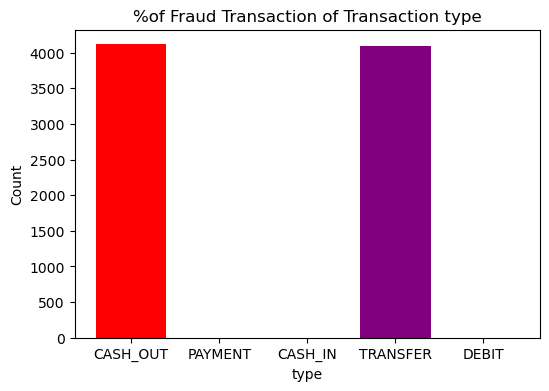

In [29]:
#visualization
col = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']
val = [cash_out, payment, cash_in, transfer, debit ]


plt.figure(figsize=(6,4))
bar_colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.bar(col,val,width=0.8,color=bar_colors)
plt.xlabel("type")
plt.ylabel("Count")
plt.title("%of Fraud Transaction of Transaction type")
plt.show()

### Since only CASH-OUT and TRANSFER transactions can be fraudulent, lets check by  reduce the size of the dataset by retaining only these transaction types and removing PAYMENT,CASH-IN and DEBIT. 

# Amount Column

### First, we check if the amount column is always positive. The following two code snippetsbreak this into the number of transactions where the amount is negative and thosewhere the amount is 0. 

In [30]:
# Check that there are no negative amounts
print('Number of transactions where the transaction amount is negative or zero are : %d '%(sum(new_df['amount'] <= 0)))

Number of transactions where the transaction amount is negative or zero are : 16 


There are only a few cases in which transacted amount is 0. We observe by exploring thedata of these transactions that they are all fraudulent transactions. So, we can assumethat if the transaction amount is 0, the transaction is fraudulent.
We remove these transactions from the data and include this condition while making the final predictions.

In [31]:
# Remove 0 amount values
new_df =new_df.loc[new_df['amount'] > 0,:]

In [32]:
new_df = df.loc[df['type'].isin(['CASH_OUT', 'TRANSFER']),:]
new_df.shape

(2770409, 12)

# Convert Categorical features into Numerical features

In [33]:
# Checking how many attributes are dtype: object
objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud'], dtype='object')


In [34]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

/tmp/ipykernel_34772/1342068641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[feat] = le.fit_transform(new_df[feat].astype(str))
/tmp/ipykernel_34772/1342068641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[feat] = le.fit_transform(new_df[feat].astype(str))
/tmp/ipykernel_34772/1342068641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

<class 'pandas.core.frame.DataFrame'>
Index: 2770409 entries, 2 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  isM             int64  
dtypes: float64(5), int64(7)
memory usage: 274.8 MB
None


/tmp/ipykernel_34772/1342068641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[feat] = le.fit_transform(new_df[feat].astype(str))


<AxesSubplot:>

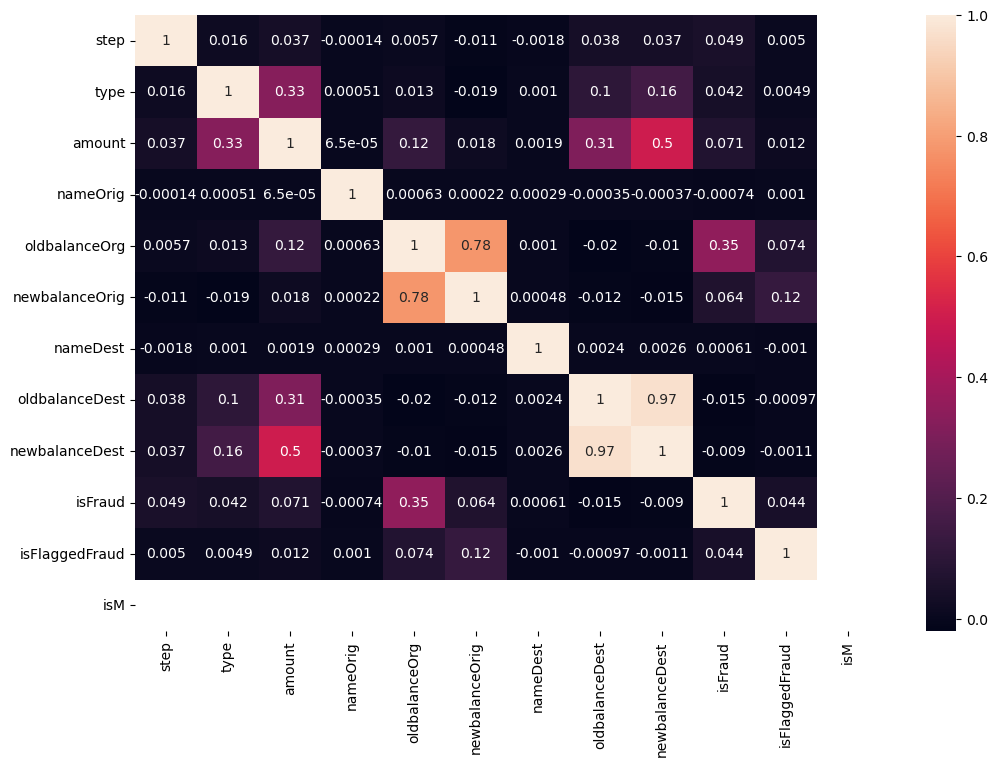

In [35]:
corr=new_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

In [37]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(new_df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = new_df.columns
    vif["VIF"] = [variance_inflation_factor(new_df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

/home/umair-pc/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,step,2.841515
1,type,1.369561
2,amount,5.326280
3,nameOrig,2.833463
4,oldbalanceOrg,3.571777
5,newbalanceOrig,3.040206
6,nameDest,2.832078
7,oldbalanceDest,65.326278
8,newbalanceDest,80.847510
9,isFraud,1.309741


In [36]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

#calc_vif(new_df)
new_df

/tmp/ipykernel_34772/2668496797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
/tmp/ipykernel_34772/2668496797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
/tmp/ipykernel_34772/2668496797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,type,amount,isFraud,isFlaggedFraud,isM,Actual_amount_orig,Actual_amount_dest,TransactionPath
2,1,181.00,1,0,0,181.00,0.00,827680.0
3,0,181.00,1,0,0,181.00,21182.00,2888181.0
15,0,229133.94,0,0,0,15325.00,-46430.44,3003786.0
19,1,215310.30,0,0,0,705.00,22425.00,986347.0
24,1,311685.89,0,0,0,10835.00,-2712905.89,1900883.0
...,...,...,...,...,...,...,...,...
6362615,0,339682.13,1,0,0,339682.13,-339682.13,2912769.0
6362616,1,6311409.28,1,0,0,6311409.28,0.00,989167.0
6362617,0,6311409.28,1,0,0,6311409.28,-6311409.27,328673.0
6362618,1,850002.52,1,0,0,850002.52,0.00,1266031.0


In [ ]:
calc_vif(df)

<AxesSubplot:>

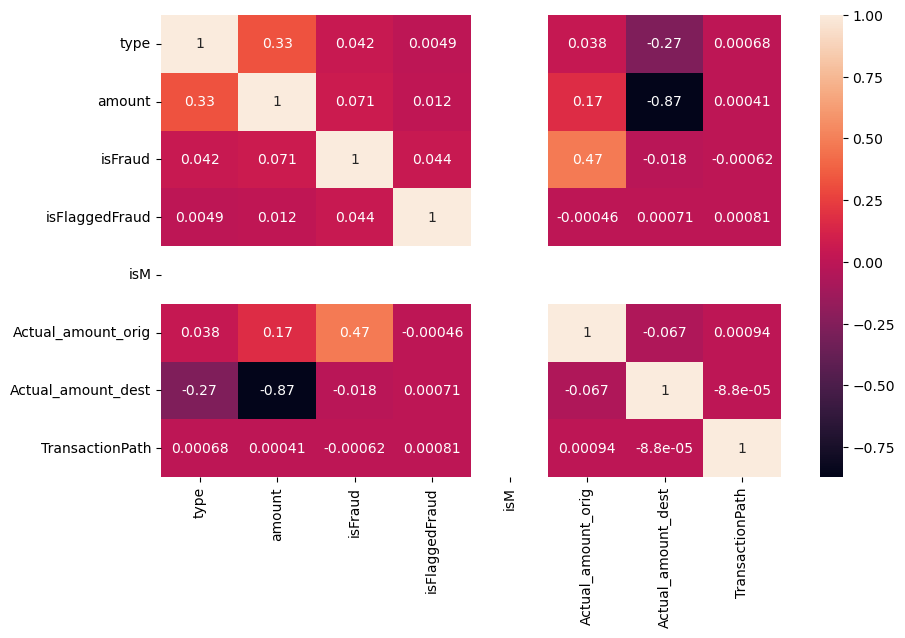

In [37]:
corr=new_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [43]:
from scipy.stats import skew, norm
#Skewed features
numeric_feats = new_df.dtypes[new_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = new_df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head()

,Skew
isFlaggedFraud,416.110037
Actual_amount_orig,41.029429
amount,21.934931
isFraud,18.284500
type,1.561033


In [44]:
high_skew = skewed_feats[skewed_feats > 0.5]
skew_index = high_skew.index
skew_index

Index(['isFlaggedFraud', 'Actual_amount_orig', 'amount', 'isFraud', 'type'], dtype='object')

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [46]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

In [47]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (1939286, 7)
Shape of X_test:  (831123, 7)


In [48]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

pred_dt = decision_tree.predict(X_test)
decision_tree.score(X_test, Y_test)*100

99.815550766854

In [49]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

pred_rf = random_forest.predict(X_test)
random_forest.score(X_test, Y_test) * 100

99.90302277761535

In [52]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    #iterations=10,
#     verbose=5,
)

clf.fit(X_train, Y_train)

pred_clf = clf.predict(X_test)
clf.score(X_test, Y_test) * 100

Learning rate set to 0.26107
0:	learn: 0.1452910	total: 229ms	remaining: 3m 48s
1:	learn: 0.0405913	total: 394ms	remaining: 3m 16s
2:	learn: 0.0143182	total: 562ms	remaining: 3m 6s
3:	learn: 0.0090938	total: 719ms	remaining: 2m 59s
4:	learn: 0.0073260	total: 888ms	remaining: 2m 56s
5:	learn: 0.0062431	total: 1.05s	remaining: 2m 54s
6:	learn: 0.0059309	total: 1.22s	remaining: 2m 53s
7:	learn: 0.0057628	total: 1.37s	remaining: 2m 50s
8:	learn: 0.0056186	total: 1.54s	remaining: 2m 49s
9:	learn: 0.0053619	total: 1.7s	remaining: 2m 48s
10:	learn: 0.0053390	total: 1.86s	remaining: 2m 47s
11:	learn: 0.0052894	total: 2.02s	remaining: 2m 46s
12:	learn: 0.0052481	total: 2.18s	remaining: 2m 45s
13:	learn: 0.0052093	total: 2.33s	remaining: 2m 44s
14:	learn: 0.0052021	total: 2.5s	remaining: 2m 43s
15:	learn: 0.0051220	total: 2.66s	remaining: 2m 43s
16:	learn: 0.0050944	total: 2.83s	remaining: 2m 43s
17:	learn: 0.0050688	total: 2.98s	remaining: 2m 42s
18:	learn: 0.0050361	total: 3.15s	remaining: 2m 

99.90181958627062

In [53]:
# classification report - DT

classification_report_dt = classification_report(Y_test, pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_clf = classification_report(Y_test, pred_clf)
print("Classification Report - CatBoost")
print(classification_report_clf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.69      0.71      0.70      2496

    accuracy                           1.00    831123
   macro avg       0.84      0.85      0.85    831123
weighted avg       1.00      1.00      1.00    831123

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.96      0.71      0.81      2496

    accuracy                           1.00    831123
   macro avg       0.98      0.85      0.91    831123
weighted avg       1.00      1.00      1.00    831123

----------------------------------------------------------------------------------------
Classification Report - CatBoost
              precision    recall  f1-score   support

    

In [58]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('dt', decision_tree), ('rf', random_forest), ('ctb', clf)] , voting='soft')
ensemble.fit(X_train, Y_train)

Learning rate set to 0.26107
0:	learn: 0.1452910	total: 218ms	remaining: 3m 38s
1:	learn: 0.0405913	total: 433ms	remaining: 3m 36s
2:	learn: 0.0143182	total: 639ms	remaining: 3m 32s
3:	learn: 0.0090938	total: 839ms	remaining: 3m 28s
4:	learn: 0.0073260	total: 1.02s	remaining: 3m 23s
5:	learn: 0.0062431	total: 1.19s	remaining: 3m 17s
6:	learn: 0.0059309	total: 1.36s	remaining: 3m 13s
7:	learn: 0.0057628	total: 1.52s	remaining: 3m 8s
8:	learn: 0.0056186	total: 1.68s	remaining: 3m 4s
9:	learn: 0.0053619	total: 1.84s	remaining: 3m 2s
10:	learn: 0.0053390	total: 2.01s	remaining: 3m
11:	learn: 0.0052894	total: 2.19s	remaining: 3m
12:	learn: 0.0052481	total: 2.36s	remaining: 2m 58s
13:	learn: 0.0052093	total: 2.53s	remaining: 2m 58s
14:	learn: 0.0052021	total: 2.7s	remaining: 2m 57s
15:	learn: 0.0051220	total: 2.86s	remaining: 2m 56s
16:	learn: 0.0050944	total: 3.03s	remaining: 2m 55s
17:	learn: 0.0050688	total: 3.18s	remaining: 2m 53s
18:	learn: 0.0050361	total: 3.35s	remaining: 2m 53s
19:	l

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('ctb',
                              <catboost.core.CatBoostClassifier object at 0x7fe47fa9ba60>)],
                 voting='soft')

In [59]:
pred_ensemble = ensemble.predict(X_test)
ensemble.score(X_test, Y_test) * 100

99.90025543752249

In [60]:
print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_ensemble = classification_report(Y_test, pred_ensemble)
print("Classification Report - ensemble")
print(classification_report_ensemble)

----------------------------------------------------------------------------------------
Classification Report - ensemble
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.95      0.71      0.81      2496

    accuracy                           1.00    831123
   macro avg       0.97      0.85      0.90    831123
weighted avg       1.00      1.00      1.00    831123



# Further improving the accuracy would need the feature engineering and handling imbalanced dataset by under sampling,over sampling,etc. which could not be done due to lack of time.